<br>

<br>
<center><font size='10' style="color:forestgreen"><b> Customer Transaction Prediction </b> </font>

<br>

<br>
<center><font size='5' style="color:black"><b> Proyecto Final - Coder House </b> </font>

<br>
<br>

<center><font size='5' style="color:black"><b> Notebook grupal </b> </font>

<br>

<br>

<br>

<br>

<font size='6' style="color:forestgreen"><b> Content </b> </font>
<a name="content"></a>
<br>


1. [Introduction](#introduction) 

<br>

2. [Import Libraries](#libraries) 

<br>


3. [Dataset](#dataset) 

    3.1 [Definition of X and y](#xy) 
    
    3.2 [Stratified K Fold](#skf)
    
    3.3 [Lists to store model's metrics](#metrics)
<br>


4. [Models](#models)

   4.1 [Logistic Regression](#lgr)
   
   4.2 [Gaussian Naive Bayes](#gbn)
   
   4.3 [Catboost Classifier](#cb)
   
   
<br>

5. [Model Stacking](#stacking)<br>
    
    5.1 [GaussianNB x 6 + Final GaussianNB](#stacking_1)
    
    5.2 [GaussianNB x 12 + Final GaussianNB](#stacking_2)
       
    5.3 [GaussianNB x 24 + Final GaussianNB](#stacking_3)
    
    5.4 [GaussianNB + Linear Discriminant Analysis + Final GaussianNB](#stacking_4)
    
    5.5 [GaussianNB x 24 + Linear Discriminant Analysis + Final GaussianNB](#stacking_5)
       
    5.6 [GaussianNB x 12 + Logistic Regression + Linear Discriminant Analysis + Final GNB](#stacking_6)
    


<br>

6. [Model Comparison](#comparison)



<br>


7. [Conclusion](#conclusion)




<br>

<br>

<br>

<br>

<font size='6' style="color:forestgreen">  <b> Introduction </b> </font>
<a name="introduction"></a>

[[ Back to Top ]](#content)

<p style='text-align: justify;'> 
Para realizar el Proyecto hemos dividido el trabajo en una fase individual y otra grupal. El objetivo de la fase de trabajo individual fue explorar los distintos modelos, de forma tal que podamos ver cuáles son los que tienen mejor rendimiento. Finalizada esa fase, continuaremos el proyecto en una notebook común, donde solamente se volcarán los modelos más relevantes para el Proyecto.    

<p style='text-align: justify;'> 
Esta notebook contiene la fase de trabajo grupal. Aquí se econtrarán los modelos básicos que resultaron más relevantes: Logistic Regression, Gaussian Naive Bayes y Catboost Classifier. A su vez, se incluirá los stacking de modelos con los que obtuvimos mejores resultados. Cabe aclarar que en este punto no solo se busca un buen Recall, sino que también que el tiempo de ejecución sea acorde. Posteriormente se graficará el resultado de los modelos, de forma tal que podamos compararlos. Por último, esbozaremos una breve conclusión sobre el proyecto. 


<br>

<br>

<br>

<br>

<font size='6' style="color:forestgreen">  <b> Import Libraries </b> </font>
<a name="libraries"></a>

[[ Back to Top ]](#content)

In [15]:
# Numeric, scientific and data science libraries
import pandas as pd
import numpy as np
from scipy.stats import gmean
from statistics import geometric_mean
import pickle

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from PIL import Image

# Data preparation for training - Sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA

# Evaluation metrics and visualization - Sklearn
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 

# Models from Sklearn, XGBOOST and Catboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import StackingClassifier

# Feature Importance
from sklearn.inspection import permutation_importance

# Bayesian Optimization
import optuna

# Others
import joblib
import time
from numpy import load
from numpy import save
from typing import List
from scipy.stats import gmean

<br>

<br>

<br>

<br>

<font size='6' style="color:forestgreen">  <b> Dataset </b> </font>
<a name="dataset"></a>

[[ Back to Top ]](#content)

In [4]:
# Abrimos el dataset. 

df = pd.read_pickle("trainDownCast.pkl")
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104


<br>

<font size='4' style="color:forestgreen">  <b> Definition of X and y </b> </font>
<a name="xy"></a>

In [6]:
# Definimos X.

X = df.drop("target", axis=1) # Se elimina del dataset la variable a predecir.
X

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.522699,-2.3978,7.8784,8.5635,12.780300,-1.0914
train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.430500,2.0339,8.1267,8.7889,18.356001,1.9518
train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.604200,3.1417,-6.5213,8.2675,14.722200,0.3965
train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.034700,-1.2706,-2.9275,10.2922,17.969700,-8.9996
train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.287600,-1.5121,3.9267,9.5031,17.997400,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_199995,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,...,6.1415,13.2305,3.9901,0.9388,18.024900,-1.7939,2.1661,8.5326,16.666000,-17.8661
train_199996,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,...,4.9611,4.6549,0.6998,1.8341,22.271700,1.7337,-2.1651,6.7419,15.905400,0.3388
train_199997,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,0.1202,6.1629,...,4.0651,5.4414,3.1032,4.8793,23.531099,-1.5736,1.2832,8.7155,13.832900,4.1995


In [5]:
# Definimos y.
y = df.target # Se define el Target.
y

ID_code
train_0         0
train_1         0
train_2         0
train_3         0
train_4         0
               ..
train_199995    0
train_199996    0
train_199997    0
train_199998    0
train_199999    0
Name: target, Length: 200000, dtype: int64

<br>

<font size='4' style="color:forestgreen">  <b> Stratified K Fold </b> </font>
<a name="skf"></a>

In [7]:
# El dataset con el que trabajamos es muy asimétrico ya que la variable target tiene una distribución donde el 90% 
# de los registros son "0" y tan solo el 10% de los registros son "1". Es por ello que utilizaremos Stratified K Fold con
# 10 folds para mantener en cada partición de datos la misma proporción de la variable target que en el dataset original.

skf = StratifiedKFold(n_splits=10, shuffle= True, random_state= 1)

skf.get_n_splits(X, y)

10

<br>

<font size='4' style="color:forestgreen">  <b> Lists to store model's metrics </b> </font>
<a name="metrics"></a>

In [28]:
# Creamos listas para almacenar el resultado de los modelos. Posteriormente armaremos un dataframe con toda esta 
# información de forma tal que podamos compararlos entre sí.

metrics = []
models = []
execution_time = []

<br>

<br>

<br>

<br>

<font size='6' style="color:forestgreen">  <b> Models </b> </font>
<a name="models"></a>

[[ Back to Top ]](#content)

En este apartado ejecutaremos los modelos simples que resultan más relevantes para nuestro proyecto. Estos son: Logistic Regression, Gaussian Naive Bayes y Catboost Classifier. Cabe aclarar que para el proyecto hemos escogido la Logistic Regression como modelo base. 

<br>

<font size='5' style="color:forestgreen">  <b> Logistic Regression </b> </font>
<a name="lgr"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.6854799941903816
Recall's geometric mean is 0.2694832658755364
F1's geometric mean is 0.38685569298903366
The model's excecution time is 988.7480003833771 seconds


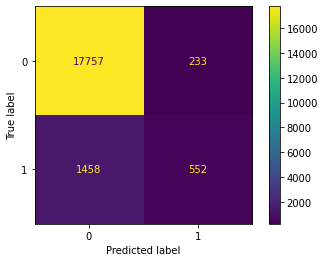

In [29]:
# Inicializamos el modelo.
lgr = LogisticRegression (random_state = 1, max_iter = 7000)

# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    lgr.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = lgr.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("Logistic Regression")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('lgr_model.pkl','wb') as f:
    pickle.dump(lgr, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_lgr_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<font size='5' style="color:forestgreen">  <b> Gaussian Naive Bayes </b> </font>
<a name="gbn"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.6474871217871533
Recall's geometric mean is 0.4037870022195769
F1's geometric mean is 0.4973673984424232
The model's excecution time is 5.183375358581543 seconds


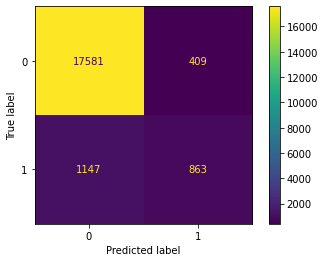

In [33]:
# Inicializamos el modelo.
gnb = GaussianNB()

# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    gnb.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = gnb.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("GaussianNB")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('gnb_model.pkl','wb') as f:
    pickle.dump(gnb, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_gnb_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<font size='5' style="color:forestgreen">  <b> Catboost Classifier </b> </font>
<a name="cb"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.5702971121416844
Recall's geometric mean is 0.38109299600428204
F1's geometric mean is 0.4568425852790152
The model's excecution time is 1442.5432043075562 seconds


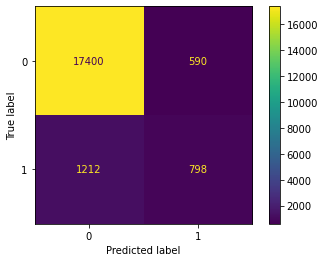

In [37]:
# Inicializamos el modelo.
# Los hiperparámetros utilizados para este modelo fueron obtenidos de la notebook del trabajo individual de Santiago 
# Marinella, donde realizó una optimización de hiperparámetros utilizando la librería Optuna.
cb = CatBoostClassifier(iterations = 3600, learning_rate = 0.85, depth = 4, logging_level = "Silent")

# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    cb.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = cb.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("Catboost Classifier")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('cb_model.pkl','wb') as f:
    pickle.dump(cb, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_cb_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<br>

<br>


<font size='6' style="color:forestgreen">  <b> Model Stacking </b> </font>
<a name="stacking"></a>

[[ Back to Top ]](#content)

En esta sección mostraremos los modelos con los que obtuvimos mejores resultados. Teniendo en cuenta no solo el Recall que arroja cada modelo, sino que también su tiempo de ejecución.

<br>

<font size='5' style="color:forestgreen">  <b> GaussianNB x 6 + Final GaussianNB </b> </font>
<a name="stacking_1"></a>

[[ Back to Top ]](#content)


Precision's geometric mean is 0.463428131233301
Recall's geometric mean is 0.6115685266114468
F1's geometric mean is 0.5272694081975693
The model's excecution time is 178.87107825279236 seconds


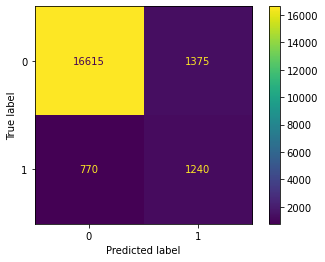

In [46]:
# Inicializamos los modelos.
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb_final = GaussianNB()

ensemble_1 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3),
('gnb4',gnb4), ('gnb5',gnb5), ('gnb6',gnb6)], final_estimator = gnb_final)

# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    ensemble_1.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = ensemble_1.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("GaussianNB x 6 + Final GaussianNB")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('ensemble_1_model.pkl','wb') as f:
    pickle.dump(ensemble_1, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_ensemble_1_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<font size='5' style="color:forestgreen">  <b> GaussianNB x 12 + Final GaussianNB </b> </font>
<a name="stacking_2"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.45207298486634323
Recall's geometric mean is 0.6225202506270616
F1's geometric mean is 0.5237586567506056
The model's excecution time is 355.4918088912964 seconds


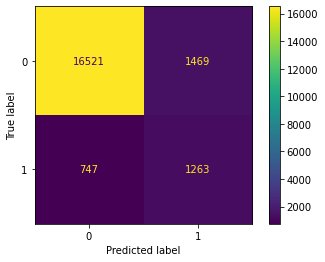

In [48]:
# Inicializamos los modelos.
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()
gnb10 = GaussianNB()
gnb11 = GaussianNB()
gnb12 = GaussianNB()
gnb_final = GaussianNB()

ensemble_2 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3),
                                                ('gnb4',gnb4), ('gnb5',gnb5), ('gnb6',gnb6),
                                                ('gnb7',gnb7), ('gnb8',gnb8), ('gnb9',gnb9), 
                                                ('gnb10',gnb10), ('gnb11',gnb11), ('gnb12',gnb12)], 
                                                final_estimator = gnb_final)

# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    ensemble_2.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = ensemble_2.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("GaussianNB x 12 + Final GaussianNB")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('ensemble_2_model.pkl','wb') as f:
    pickle.dump(ensemble_2, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_ensemble_2_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<font size='5' style="color:forestgreen">  <b> GaussianNB x 24 + Final GaussianNB </b> </font>
<a name="stacking_3"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.44710128950107364
Recall's geometric mean is 0.6296900275555035
F1's geometric mean is 0.5228956580770866
The model's excecution time is 724.7539479732513 seconds


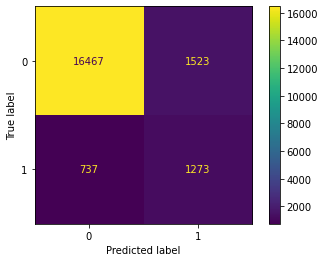

In [50]:
# Inicializamos los modelos.
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()
gnb10 = GaussianNB()
gnb11 = GaussianNB()
gnb12 = GaussianNB()
gnb13 = GaussianNB()
gnb14 = GaussianNB()
gnb15 = GaussianNB()
gnb16 = GaussianNB()
gnb17 = GaussianNB()
gnb18 = GaussianNB()
gnb19 = GaussianNB()
gnb20 = GaussianNB()
gnb21 = GaussianNB()
gnb22 = GaussianNB()
gnb23 = GaussianNB()
gnb24 = GaussianNB()
gnb_final = GaussianNB()

ensemble_3 = StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3), ('gnb4',gnb4), ('gnb5',gnb5), 
                                                ('gnb6',gnb6),('gnb7',gnb7), ('gnb8',gnb8), ('gnb9',gnb9), ('gnb10',gnb10), 
                                                ('gnb11',gnb11), ('gnb12',gnb12),('gnb13',gnb13),('gnb14',gnb14), 
                                                ('gnb15',gnb15), ('gnb16',gnb16),('gnb17',gnb17), ('gnb18',gnb18), 
                                                ('gnb19',gnb19), ('gnb20',gnb20), ('gnb21',gnb21), ('gnb22',gnb22),
                                                ('gnb23',gnb23), ('gnb24',gnb24)], final_estimator = gnb_final)                                              
                                               
# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    ensemble_3.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = ensemble_3.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("GaussianNB x 24 + Final GaussianNB")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('ensemble_3_model.pkl','wb') as f:
    pickle.dump(ensemble_3, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_ensemble_3_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<font size='5' style="color:forestgreen">  <b> GaussianNB + Linear Discriminant Analysis + Final GaussianNB </b> </font>
<a name="stacking_4"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.5097203526682593
Recall's geometric mean is 0.5535900725379281
F1's geometric mean is 0.5307303290485371
The model's excecution time is 265.8979525566101 seconds


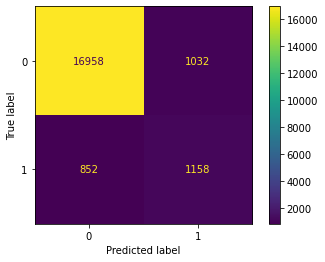

In [52]:
# Inicializamos los modelos.
gnb = GaussianNB()
lda = LinearDiscriminantAnalysis()
gnb_final = GaussianNB()

ensemble_4 =  StackingClassifier (estimators = [ ('gnb',gnb), ('lda',lda)], final_estimator = gnb_final)

# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    ensemble_4.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = ensemble_4.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("GaussianNB + Linear Discriminant Analysis + Final GaussianNB")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('ensemble_4_model.pkl','wb') as f:
    pickle.dump(ensemble_4, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_ensemble_4_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<font size='5' style="color:forestgreen">  <b> GaussianNB x 24 + Linear Discriminant Analysis + Final GaussianNB </b> </font>
<a name="stacking_5"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.4473001052944805
Recall's geometric mean is 0.6311955268410712
F1's geometric mean is 0.5235505842526464
The model's excecution time is 940.5758290290833 seconds


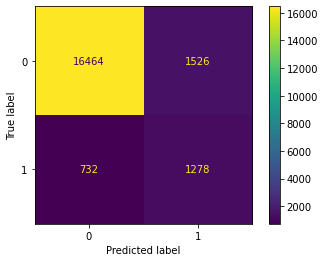

In [59]:
# Inicializamos los modelos.
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()
gnb10 = GaussianNB()
gnb11 = GaussianNB()
gnb12 = GaussianNB()
gnb13 = GaussianNB()
gnb14 = GaussianNB()
gnb15 = GaussianNB()
gnb16 = GaussianNB()
gnb17 = GaussianNB()
gnb18 = GaussianNB()
gnb19 = GaussianNB()
gnb20 = GaussianNB()
gnb21 = GaussianNB()
gnb22 = GaussianNB()
gnb23 = GaussianNB()
gnb24 = GaussianNB()
gnb_final = GaussianNB()

ensemble_5 = StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3), ('gnb4',gnb4), ('gnb5',gnb5), 
                                                ('gnb6',gnb6),('gnb7',gnb7), ('gnb8',gnb8), ('gnb9',gnb9), ('gnb10',gnb10), 
                                                ('gnb11',gnb11), ('gnb12',gnb12),('gnb13',gnb13),('gnb14',gnb14), 
                                                ('gnb15',gnb15), ('gnb16',gnb16),('gnb17',gnb17), ('gnb18',gnb18), 
                                                ('gnb19',gnb19), ('gnb20',gnb20), ('gnb21',gnb21), ('gnb22',gnb22),
                                                ('gnb23',gnb23), ('gnb24',gnb24), ('lda',lda)], final_estimator = gnb_final)                                              
                                               
# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    ensemble_5.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = ensemble_5.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("GaussianNB x 24 + Linear Discriminant Analysis + Final GaussianNB")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('ensemble_5_model.pkl','wb') as f:
    pickle.dump(ensemble_5, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_ensemble_5_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<font size='5' style="color:forestgreen">  <b> GaussianNB x 12 + Logistic Regression + Linear Discriminant Analysis + Final GNB </b> </font>
<a name="stacking_6"></a>

[[ Back to Top ]](#content)

Precision's geometric mean is 0.45320422686810674
Recall's geometric mean is 0.6266618302730924
F1's geometric mean is 0.5259844187987077
The model's excecution time is 5492.861884832382 seconds


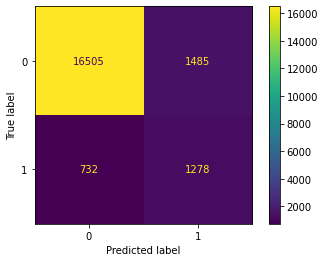

In [61]:
# Inicializamos los modelos.
lda = LinearDiscriminantAnalysis()
lgr = LogisticRegression (max_iter = 7000)
gnb = GaussianNB()
gnb2 = GaussianNB()
gnb3 = GaussianNB()
gnb4 = GaussianNB()
gnb5 = GaussianNB()
gnb6 = GaussianNB()
gnb7 = GaussianNB()
gnb8 = GaussianNB()
gnb9 = GaussianNB()
gnb10 = GaussianNB()
gnb11 = GaussianNB()
gnb12 = GaussianNB()
gnb_final = GaussianNB()

ensemble_6 =  StackingClassifier (estimators = [ ('gnb',gnb), ('gnb2',gnb2), ('gnb3',gnb3),
                                               ('gnb4',gnb4), ('gnb5',gnb5), ('gnb6',gnb6),
                                               ('gnb7',gnb7), ('gnb8',gnb8), ('gnb9',gnb9), 
                                               ('gnb10',gnb10), ('gnb11',gnb11), ('gnb12',gnb12),
                                               ('lda',lda), ('lgr',lgr)], final_estimator = gnb_final)

# Creamos una lista para almacenar las métricas de cada fold.
model_metrics = []

# Iniciamos el contador de tiempo para calcular el costo del modelo.
inicio = time.time()

# Separamos cada fold en training y testing.
for train_index, test_index in skf.split(X, y):
        
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test  = y.iloc[test_index]
    
    # Entrenamos el modelo.
    ensemble_6.fit(X_train, y_train)
    
    # Hacemos predicciones.
    y_pred = ensemble_6.predict(X_test)
    
    # Cálculo de métricas.
    cm        = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall    = recall_score(y_test, y_pred)
    f1        = f1_score(y_test, y_pred)

    # Guardamos las métricas de cada fold.
    results = [precision, recall, f1]
    model_metrics.append(results)
    
# Finalizamos el contador de tiempo del modelo.
fin = time.time()

# Guardamos e imprimimos la media geométrica de las métricas de los folds.
results_gmean = gmean(model_metrics)
print("Precision's geometric mean is" , results_gmean[0])
print("Recall's geometric mean is", results_gmean[1])
print("F1's geometric mean is", results_gmean[2]) 

# Los guardamos en las listas que contienen los resultados generales.
models.append("GaussianNB x 12 + Logistic Regression + Linear Discriminant Analysis + Final GaussianNB")
metrics.append(results_gmean)
execution_time.append(fin - inicio)
print("The model's excecution time is", fin-inicio, "seconds")

# Guardamos el modelo.
with open('ensemble_6_model.pkl','wb') as f:
    pickle.dump(ensemble_6, f)
    
# Matriz de Confusión.
resultados_cm = gmean(cm)

with open('cm_ensemble_6_results.pkl','wb') as f:
    pickle.dump(resultados_cm, f)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm.reshape(2,2), display_labels = [0, 1])
cm_display.plot()
plt.show()

<br>

<br>

<br>

<br>

<font size='6' style="color:forestgreen">  <b> Model Comparison </b> </font>
<a name="comparison"></a>

[[ Back to Top ]](#content)

In [62]:
# Creamos un dataframe para almacenar los resultados de todos los modelos. 

columnas = ["PRECISION", "RECALL", "F1"]
model_comparison = pd.DataFrame(metrics, columns = columnas, index = models)
model_comparison

,PRECISION,RECALL,F1
Logistic Regression,0.685480,0.269483,0.386856
GaussianNB,0.647487,0.403787,0.497367
Catboost Classifier,0.570297,0.381093,0.456843
GaussianNB x 6 + Final GaussianNB,0.463428,0.611569,0.527269
GaussianNB x 12 + Final GaussianNB,0.452073,0.622520,0.523759
GaussianNB x 24 + Final GaussianNB,0.447101,0.629690,0.522896
GaussianNB + Linear Discriminant Analysis + Final GaussianNB,0.509720,0.553590,0.530730
GaussianNB x 24 + Linear Discriminant Analysis + Final GaussianNB,0.447300,0.631196,0.523551
GaussianNB x 12 + Logistic Regression + Linear Discriminant Analysis + Final GaussianNB,0.453204,0.626662,0.525984


In [64]:
# Añadimos la columna de "Tiempo de ejecicón" al dataframe creado.

model_comparison['EXECUTION TIME (s)'] = execution_time
model_comparison

,PRECISION,RECALL,F1,EXECUTION TIME (s)
Logistic Regression,0.685480,0.269483,0.386856,988.748000
GaussianNB,0.647487,0.403787,0.497367,5.183375
Catboost Classifier,0.570297,0.381093,0.456843,1442.543204
GaussianNB x 6 + Final GaussianNB,0.463428,0.611569,0.527269,178.871078
GaussianNB x 12 + Final GaussianNB,0.452073,0.622520,0.523759,355.491809
GaussianNB x 24 + Final GaussianNB,0.447101,0.629690,0.522896,724.753948
GaussianNB + Linear Discriminant Analysis + Final GaussianNB,0.509720,0.553590,0.530730,265.897953
GaussianNB x 24 + Linear Discriminant Analysis + Final GaussianNB,0.447300,0.631196,0.523551,940.575829
GaussianNB x 12 + Logistic Regression + Linear Discriminant Analysis + Final GaussianNB,0.453204,0.626662,0.525984,5492.861885


In [65]:
# Almacenamos el dataframe. 

with open('model_comparison.pkl','wb') as f:
    pickle.dump(model_comparison, f)

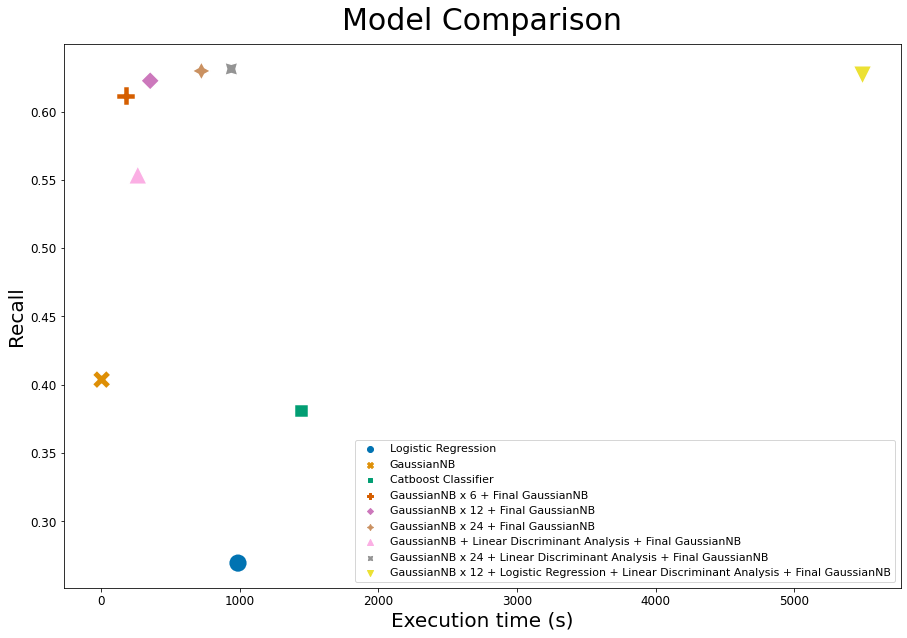

In [78]:
# Realizamos un gráfico donde se compara el tiempo de ejecución y el recall de los modelos. 
# Cabe aclarar que el timepo de ejecución nos indica qué tan costoso será un modelo.

plt.figure(figsize = (15, 10))
ax=sns.scatterplot(data = model_comparison, x = model_comparison['EXECUTION TIME (s)'],y = model_comparison['RECALL'], 
                hue = model_comparison.index, style = model_comparison.index, palette = 'colorblind', s = 350) 
plt.xlabel('Execution time (s)', y = -0.8, fontsize = 20)
plt.ylabel('Recall', x = -1, fontsize = 20)
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Model Comparison', y = 1.015, fontsize = 30)
plt.legend(fontsize = 11)
plt.show()

<br>

<br>

<br>

<br>

<font size='6' style="color:forestgreen">  <b> Conclusion </b> </font>
<a name="conclusion"></a>

[[ Back to Top ]](#content)

<p style='text-align: justify;'>   
Teniendo en cuenta tanto el Recall como el tiempo de ejecución, consideramos que los mejores resultados se lograron con un stacking de los siguientes modelos: GaussianNB x 24 + Linear Discriminant Analysis + Final Estimator GaussianNB. Con dicho modelo de ensamble se obtuvo un Recall de 0.631196 y un tiempo de ejecución de 940.58 segundos. Si bien el tiempo que tarda en ejecutarse el modelo es mayor a otros, el mismo es de 15.15 minutos, que resulta económico para el uso que se le dará al modelo.

<p style='text-align: justify;'>
El modelo base con el que se comenzó el proyecto es la Regresión Logística con un Recall de 0.269483 y un tiempo de ejecución de 988.74. El modelo de ensable mencionado resulta un incremento del 134,2% de la métrica Recall en comparación con el modelo base y una disminución del 5% del tiempo de ejecución. Teniendo en cuenta que el dataset cuenta con 200 000 registros, donde un 10% son personas que han realizado una transacción, con la Regresión Logística podíamos predecir 5 390 transacciones que se realizarían. Mientras que con el nuevo modelo se pueden predecir 12 623 transacciones. Es decir que con el modelo de ensamble podemos predecir de forma eficiente 7 233 clientes más que realizarán una operación.


<p style='text-align: justify;'>
Sin embargo, cabe destacar que este trabajo es un primer acercamiento al problema. Consideramos que sería necesario un mayor poder de procesamiento que nos permitiese realizar un análisis más profundo. Con mayor poder computacional se podría realizar optimizaciones más robustas y en mayor cantidad, también se podría explorar con modelos más complejos tales como las redes neuronales.

<br>

<br>